In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
%matplotlib inline





In [12]:
class GD:
	def __init__(self, feature_count, y_obs, features, learningRate, maxSteps=1000, minStepSize=0.001, intercept=True):
		
		self.feature_count=feature_count
		self.y_obs=y_obs.values
		self.intercept=intercept
		self.coeff=np.linspace(1,1,feature_count)
		if intercept:
			features['intercept']=1
			self.coeff=np.append(self.coeff,0)
		self.features=features.values
		self.learningRate=learningRate
		
		
		self.maxSteps=maxSteps
		self.minStepSize=minStepSize

		
	def costFunction(self):
		cost=0
		for j in range(len(self.y_obs)):
			(y, f) = (self.y_obs[j], self.features[j])
			ff=np.array(f)
			#print(ff,y, sum(self.coeff*ff))
			#Indidividual Squared Residual (y-(ax1+bx2+cx3.. +intercept))
			c=y-sum(self.coeff*ff)
			#print(c)
			cost+=c**2
		return cost
	
	def gradient(self):
		slope=[]
		for i in range(self.feature_count):
			c=0
			for j in range(len(self.y_obs)):
				#print(j)
				(y,f) = (self.y_obs[j], self.features[j])
				ff=np.array(f)
				#print((-2)*self.coeff[i]*(y-sum(self.coeff*ff)))
				c+=(-2)*self.coeff[i]*(y-sum(self.coeff*ff))
			if self.intercept:
				#print((-1)*(y-sum(self.coeff*ff)))
				c+=(-1)*(y-sum(self.coeff*ff))
			slope.append(c)
		return np.array(slope)
	
	def descent(self):
		stepSize=np.linspace(1,1,self.feature_count)
		if self.intercept:
			stepSize=np.append(stepSize,1)
		s=0
		costPoints=[]
# 		print(self.coeff)
		CFS=[]
		
		while True: 
# 			print(s)
			#print(CFS)
			costPoints.append(self.costFunction())
			CFS.append(self.coeff.copy())
			#print(costPoints)
			t=self.gradient()
			stepSize=t*self.learningRate
			#print(t)
			self.coeff-=stepSize
			#print(self.coeff)
			s=s+1
# 			print(stepSize)
			if s>self.maxSteps or (abs(stepSize)<self.minStepSize).any():
				break
		
		return [self.coeff,costPoints, CFS]
	


# Learning Rate 0.1(Not Optimal)

[1.17435953 0.17435953]


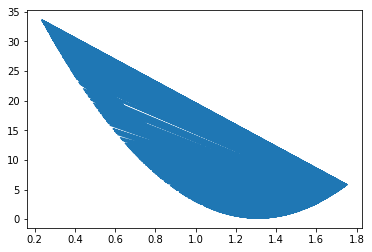

In [13]:
df=pd.read_csv('data.txt')
g=GD(1, df['y'], df[['f1']], .1, 1000, 0.0001,intercept=True)
coefficients,costPoints, CFS=g.descent()
print(coefficients)
plt.plot(pd.DataFrame(CFS)[0], costPoints)
plt.show()


# Learning Rate 0.01(Optimal)

[1.32114306 0.32114306]


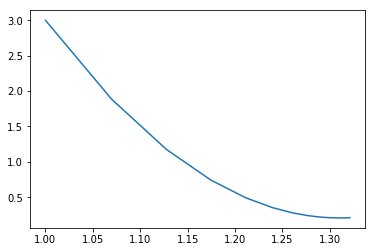

In [14]:
df=pd.read_csv('data.txt')
g=GD(1, df['y'], df[['f1']], .01, 1000, 0.0001,intercept=True)
coefficients,costPoints, CFS=g.descent()
print(coefficients)
plt.plot(pd.DataFrame(CFS)[0], costPoints)
plt.show()

# Learning Rate 0.001(Too Small)

[1.31781106 0.31781106]


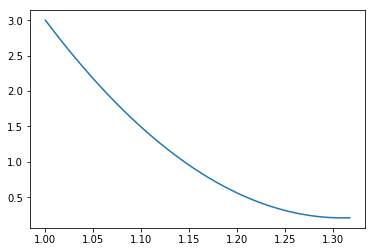

In [15]:
df=pd.read_csv('data.txt')
g=GD(1, df['y'], df[['f1']], .001, 1000, 0.0001,intercept=True)
coefficients,costPoints, CFS=g.descent()
print(coefficients)
plt.plot(pd.DataFrame(CFS)[0], costPoints)
plt.show()

# Learning Rate 0.0001 (Very Small)

[1.28427066 0.28427066]


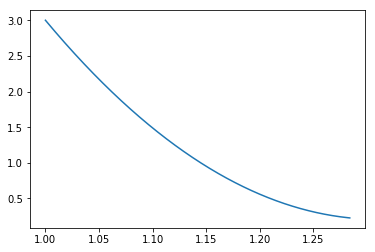

In [16]:
df=pd.read_csv('data.txt')
g=GD(1, df['y'], df[['f1']], .0001, 1000, 0.0001,intercept=True)
coefficients,costPoints, CFS=g.descent()
print(coefficients)
plt.plot(pd.DataFrame(CFS)[0], costPoints)
plt.show()

# Learning Rate 1 (Too Big)

C:\Users\SirajuddinMohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
C:\Users\SirajuddinMohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
C:\Users\SirajuddinMohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\SirajuddinMohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less


[nan nan]


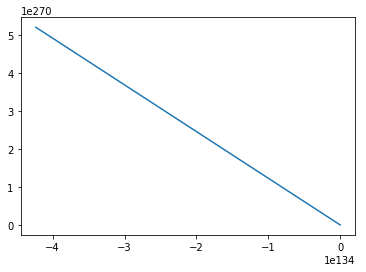

In [17]:
df=pd.read_csv('data.txt')
g=GD(1, df['y'], df[['f1']], 1, 1000, 0.0001,intercept=True)
coefficients,costPoints, CFS=g.descent()
print(coefficients)
plt.plot(pd.DataFrame(CFS)[0], costPoints)
plt.show()